In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('teams.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(2144, 11)

In [4]:
df.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [5]:
df.columns

Index(['team', 'country', 'year', 'events', 'athletes', 'age', 'height',
       'weight', 'medals', 'prev_medals', 'prev_3_medals'],
      dtype='object')

In [6]:
df.describe()

,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
count,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2014.000000,2014.000000
mean,1994.507463,35.724813,73.693097,24.778591,173.900233,69.271595,10.556437,10.248759,9.449901
std,15.384205,49.490270,127.907577,2.808559,5.357367,7.606507,33.028143,31.951920,28.232227
min,1964.000000,1.000000,1.000000,17.000000,151.000000,43.000000,0.000000,0.000000,0.000000
25%,1984.000000,6.000000,7.000000,23.275000,170.500000,64.500000,0.000000,0.000000,0.000000
50%,1996.000000,13.000000,19.000000,24.700000,174.400000,69.400000,0.000000,0.000000,0.300000
75%,2008.000000,44.000000,70.250000,26.100000,177.300000,73.400000,4.000000,4.000000,4.650000
max,2016.000000,270.000000,839.000000,66.000000,193.000000,148.000000,442.000000,442.000000,314.000000


In [7]:
df.isna().sum()

team               0
country            0
year               0
events             0
athletes           0
age                0
height             0
weight             0
medals             0
prev_medals      130
prev_3_medals    130
dtype: int64

In [8]:
df.duplicated().drop

<bound method Series.drop of 0       False
1       False
2       False
3       False
4       False
        ...  
2139    False
2140    False
2141    False
2142    False
2143    False
Length: 2144, dtype: bool>

In [9]:
df.shape

(2144, 11)

In [10]:
df['prev_medals'].unique()

array([  0.,   1.,  nan,   2.,   3.,   5.,   4.,  13.,  20.,  49.,  51.,
        19.,   6.,  46.,  44.,  23.,  52.,  35.,  57., 132., 183., 157.,
       149., 114.,   8.,   7.,  10.,  11.,   9.,  22.,  15.,  29.,  12.,
        36.,  14.,  63.,  48.,  40.,  78.,  59.,  26.,  39.,  90.,  41.,
        17.,  21.,  87.,  50.,  31.,  55.,  74.,  82., 106.,  79.,  94.,
       184., 125.,  18.,  28.,  24.,  69.,  65.,  62.,  47.,  25.,  16.,
        66.,  42.,  30.,  70.,  27.,  67.,  53.,  77., 102., 158.,  32.,
        71.,  54.,  81., 126., 151., 195., 264.,  89., 116., 198., 124.,
       118.,  99.,  56.,  61.,  45.,  43.,  88.,  33.,  37., 104.,  68.,
        93.,  84.,  73.,  58.,  38., 115., 187., 189., 142., 140.,  34.,
       169., 174., 192., 214., 286., 442., 166., 171., 164., 352., 207.,
       224., 259., 242., 263., 317., 248.])

In [11]:
df['prev_3_medals'].unique()

array([0.000e+00, 3.000e-01, 7.000e-01,       nan, 1.300e+00, 1.700e+00,
       3.300e+00, 2.700e+00, 2.300e+00, 1.000e+00, 4.000e+00, 4.300e+00,
       5.000e+00, 1.170e+01, 1.400e+01, 2.970e+01, 4.000e+01, 3.970e+01,
       2.000e+00, 1.500e+00, 3.000e+00, 4.430e+01, 5.230e+01, 4.700e+01,
       3.830e+01, 3.130e+01, 1.870e+01, 2.930e+01, 3.330e+01, 4.800e+01,
       7.470e+01, 1.240e+02, 1.573e+02, 1.630e+02, 1.400e+02, 3.700e+00,
       7.300e+00, 5.700e+00, 6.000e+00, 6.700e+00, 5.000e-01, 4.700e+00,
       5.300e+00, 2.300e+01, 2.250e+01, 2.000e+01, 2.200e+01, 2.230e+01,
       8.700e+00, 9.700e+00, 1.600e+01, 2.270e+01, 2.430e+01, 4.170e+01,
       5.030e+01, 5.530e+01, 5.900e+01, 1.430e+01, 1.930e+01, 2.900e+01,
       5.670e+01, 4.930e+01, 2.630e+01, 1.700e+01, 8.000e+00, 1.070e+01,
       1.100e+01, 1.470e+01, 4.030e+01, 5.130e+01, 3.900e+01, 3.270e+01,
       2.770e+01, 3.570e+01, 7.000e+00, 3.700e+01, 4.200e+01, 6.930e+01,
       8.000e+01, 8.900e+01, 9.300e+01, 1.190e+02, 

In [12]:
x = np.mean(df['prev_3_medals'])

In [13]:
y = np.mean(df['prev_medals'])

In [14]:
y

10.24875868917577

In [15]:
df.dropna(how = 'all', inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [17]:
df.shape

(2144, 11)

In [18]:
df.columns

Index(['team', 'country', 'year', 'events', 'athletes', 'age', 'height',
       'weight', 'medals', 'prev_medals', 'prev_3_medals'],
      dtype='object')

In [19]:
df['prev_medals'].fillna(value = y, inplace = True)

In [20]:
df.isna().sum()

team               0
country            0
year               0
events             0
athletes           0
age                0
height             0
weight             0
medals             0
prev_medals        0
prev_3_medals    130
dtype: int64

In [21]:
df.head(50)

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.000000,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.000000,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.000000,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.000000,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.000000,0.0
5,AFG,Afghanistan,2008,4,4,22.5,179.2,62.8,1,0.000000,0.0
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.000000,0.3
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.000000,0.7
8,AHO,Netherlands Antilles,1964,4,4,28.5,171.2,69.4,0,0.000000,0.0
9,AHO,Netherlands Antilles,1968,4,5,31.0,173.2,67.8,0,0.000000,0.0


In [22]:
df.drop(labels = ['prev_3_medals'], axis = 1, inplace = True)

In [23]:
df.head(10)

,team,country,year,events,athletes,age,height,weight,medals,prev_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0
5,AFG,Afghanistan,2008,4,4,22.5,179.2,62.8,1,0.0
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0
8,AHO,Netherlands Antilles,1964,4,4,28.5,171.2,69.4,0,0.0
9,AHO,Netherlands Antilles,1968,4,5,31.0,173.2,67.8,0,0.0


In [24]:
df['prev_medals'] = df['prev_medals'].astype('int')

In [25]:
df = df[[#'team', 
    #'country',
    'year', 'events', 'athletes', 'age', 'height',
       'weight', 'medals', 'prev_medals']]

In [26]:
df.columns

Index(['year', 'events', 'athletes', 'age', 'height', 'weight', 'medals',
       'prev_medals'],
      dtype='object')

In [27]:
df.describe()

,year,events,athletes,age,height,weight,medals,prev_medals
count,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000
mean,1994.507463,35.724813,73.693097,24.778591,173.900233,69.271595,10.556437,10.233675
std,15.384205,49.490270,127.907577,2.808559,5.357367,7.606507,33.028143,30.967672
min,1964.000000,1.000000,1.000000,17.000000,151.000000,43.000000,0.000000,0.000000
25%,1984.000000,6.000000,7.000000,23.275000,170.500000,64.500000,0.000000,0.000000
50%,1996.000000,13.000000,19.000000,24.700000,174.400000,69.400000,0.000000,0.000000
75%,2008.000000,44.000000,70.250000,26.100000,177.300000,73.400000,4.000000,7.000000
max,2016.000000,270.000000,839.000000,66.000000,193.000000,148.000000,442.000000,442.000000


In [28]:
df.columns

Index(['year', 'events', 'athletes', 'age', 'height', 'weight', 'medals',
       'prev_medals'],
      dtype='object')

In [29]:
correlation = df[['year', 'events', 'athletes', 'age', 'height', 'weight', 'medals', 'prev_medals']].corr()

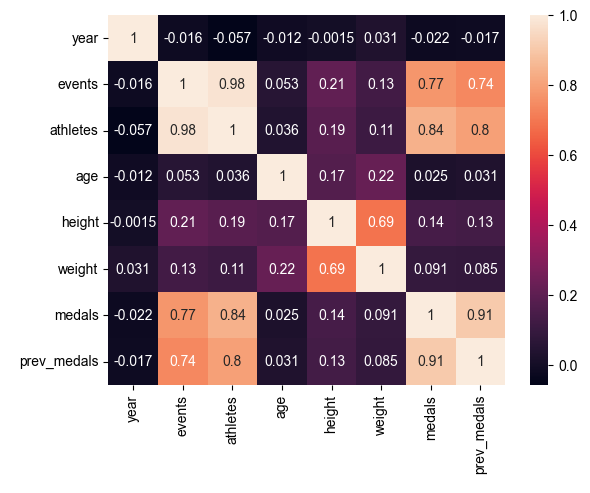

In [30]:
ax = sns.heatmap(correlation, annot = True)
for bars in ax.containers:
    ax.bar_labels(bars)
sns.set(rc={'figure.figsize':(10,8)})

In [31]:
correlation

,year,events,athletes,age,height,weight,medals,prev_medals
year,1.000000,-0.016345,-0.056957,-0.012179,-0.001459,0.031400,-0.021603,-0.016835
events,-0.016345,1.000000,0.976446,0.053461,0.208067,0.127031,0.771330,0.738702
athletes,-0.056957,0.976446,1.000000,0.036358,0.186134,0.109439,0.840817,0.797379
age,-0.012179,0.053461,0.036358,1.000000,0.173694,0.220497,0.025096,0.031117
height,-0.001459,0.208067,0.186134,0.173694,1.000000,0.687398,0.141055,0.132106
weight,0.031400,0.127031,0.109439,0.220497,0.687398,1.000000,0.090577,0.084767
medals,-0.021603,0.771330,0.840817,0.025096,0.141055,0.090577,1.000000,0.907985
prev_medals,-0.016835,0.738702,0.797379,0.031117,0.132106,0.084767,0.907985,1.000000


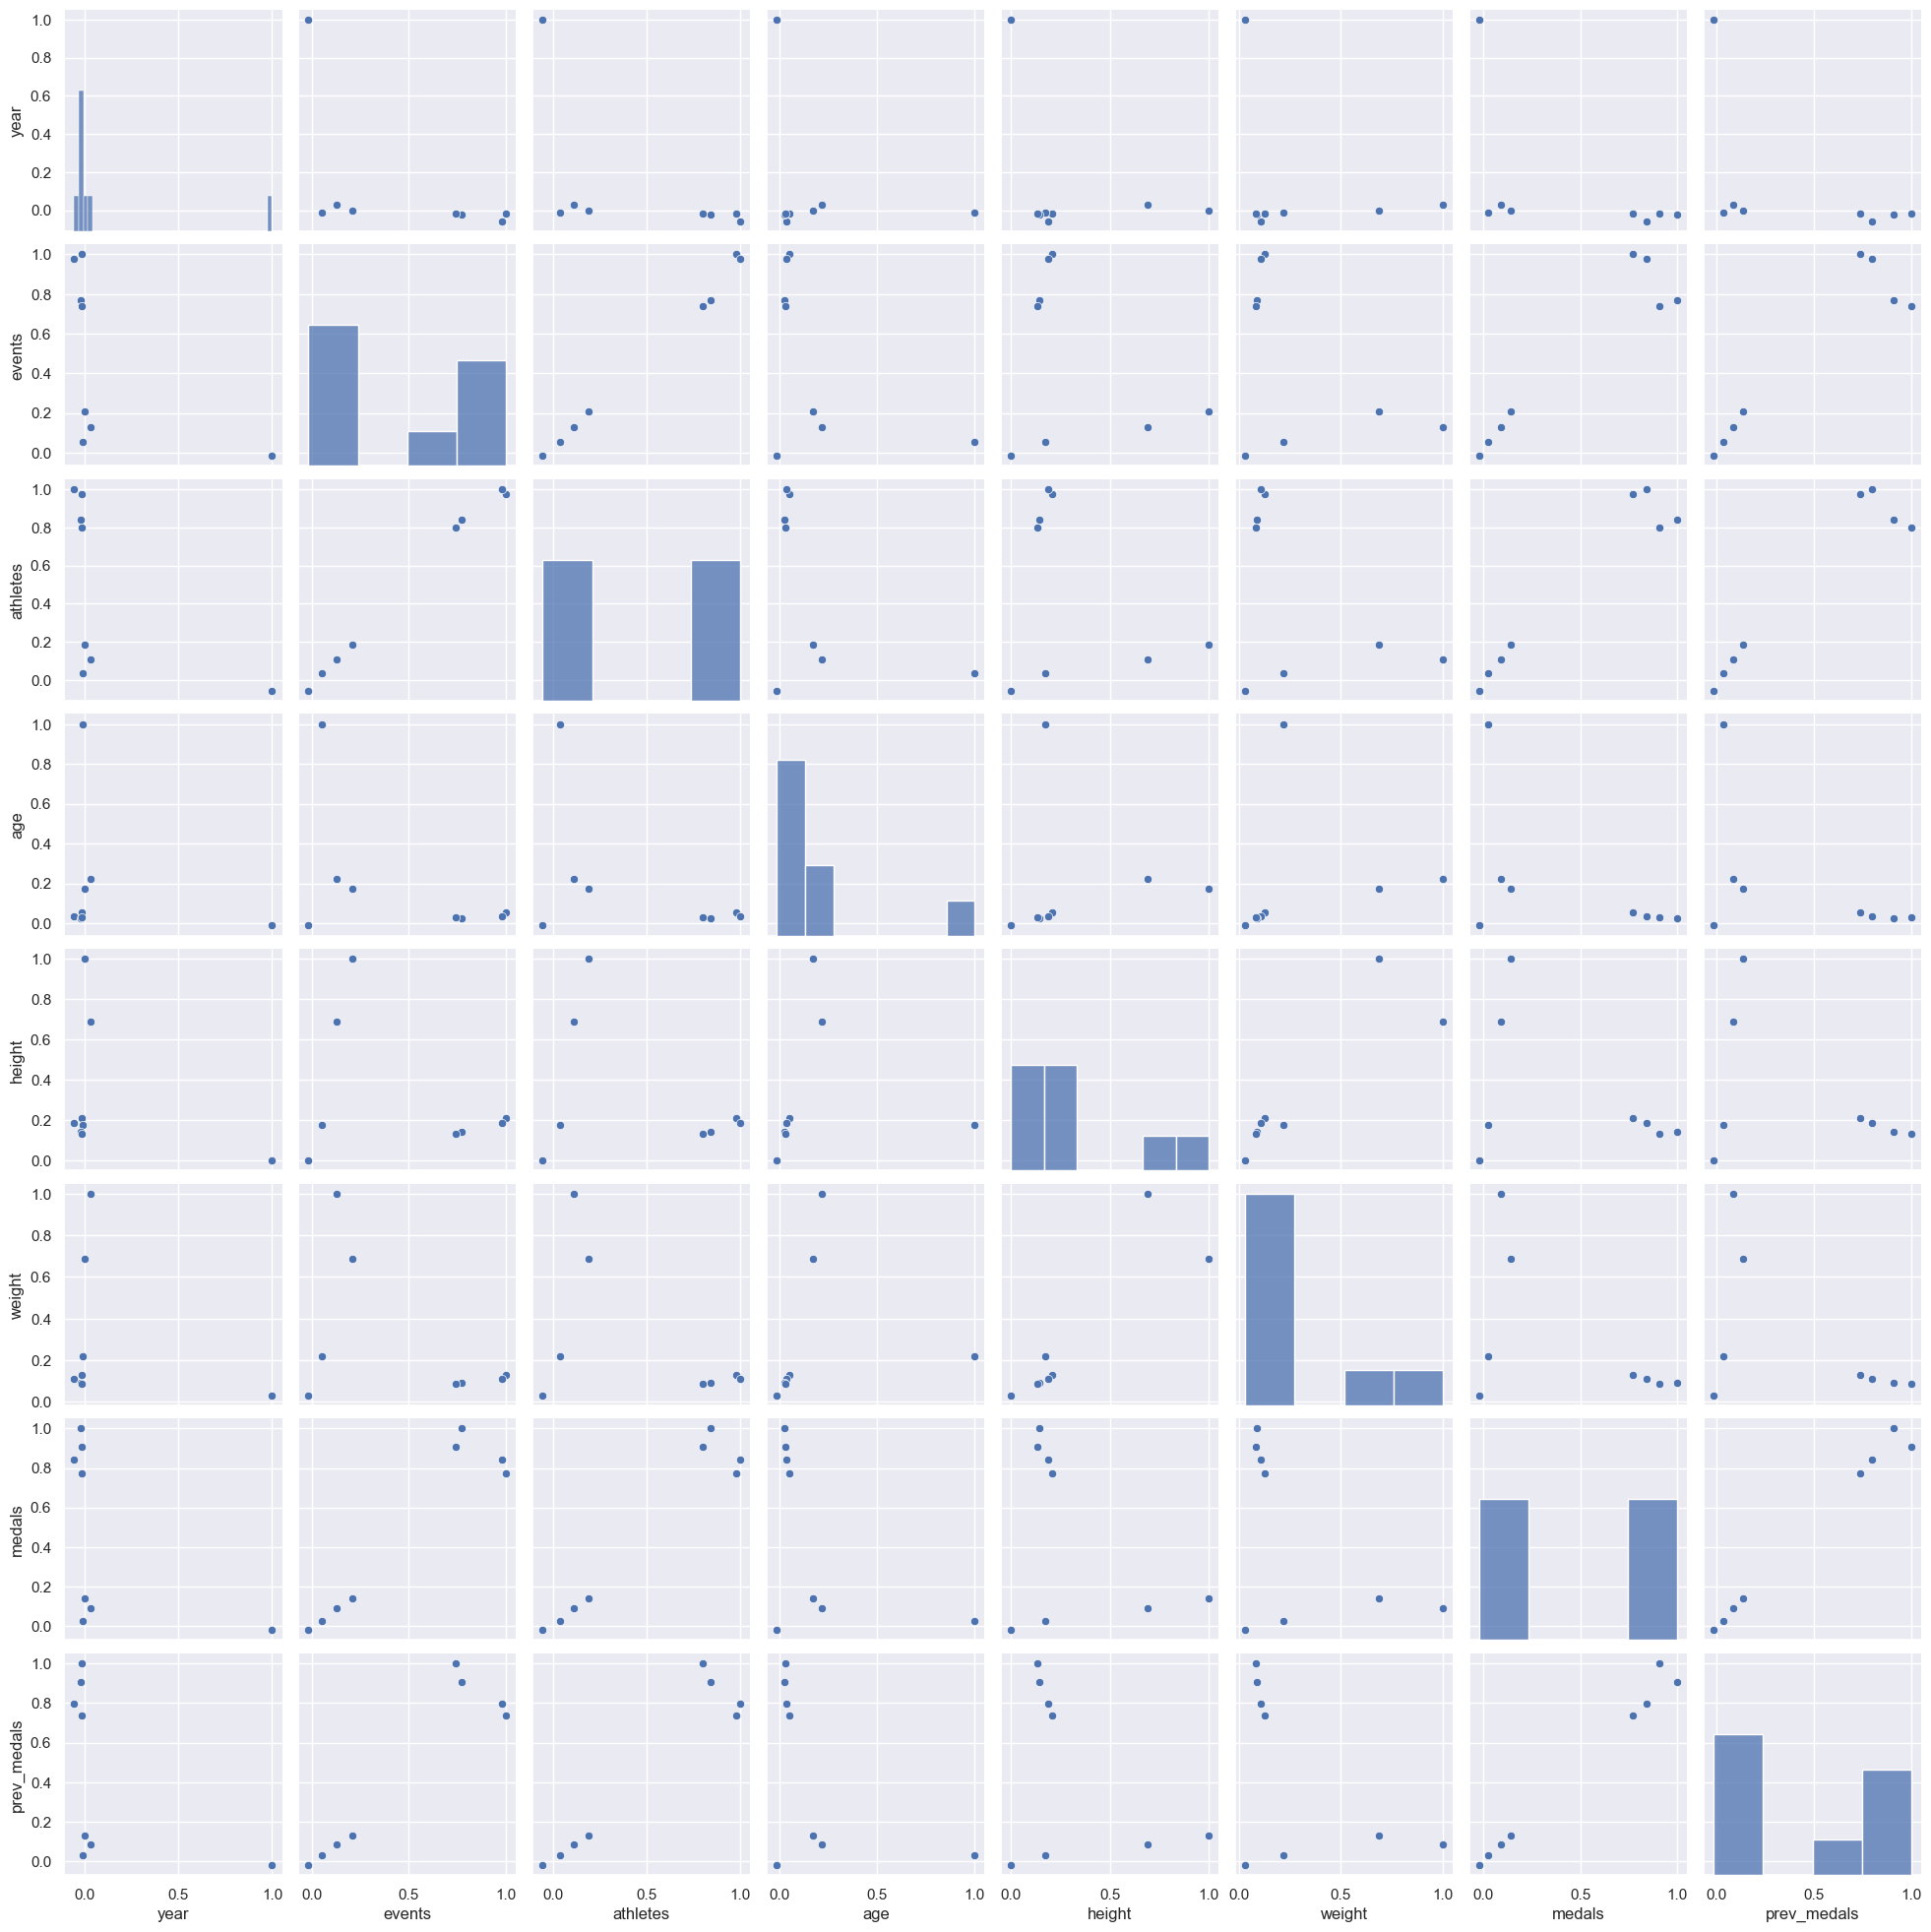

In [32]:
sns.pairplot(data = correlation)


<Axes: xlabel='year', ylabel='medals'>

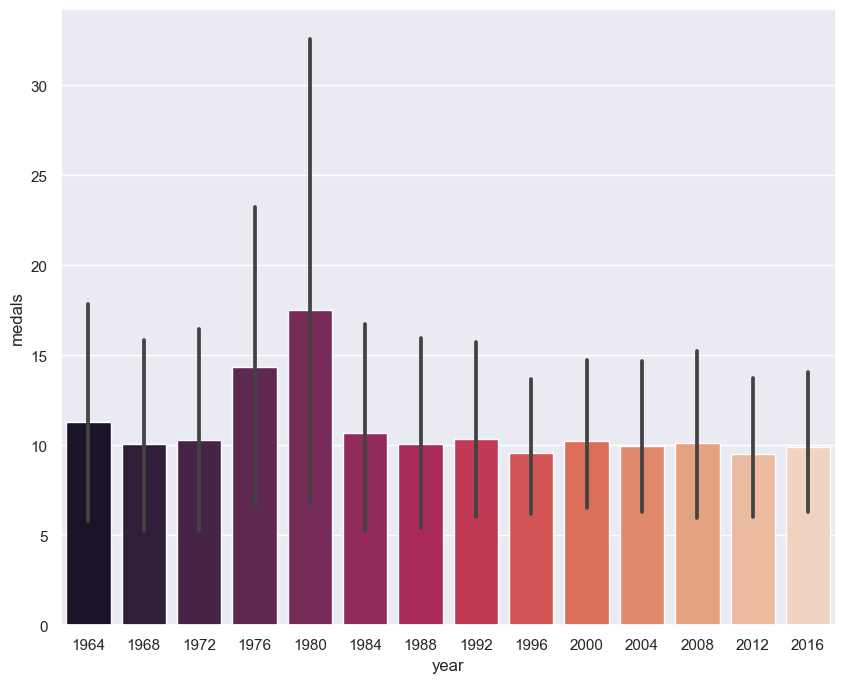

In [33]:
sns.barplot(x = 'year', y = 'medals', data = df, palette = 'rocket')

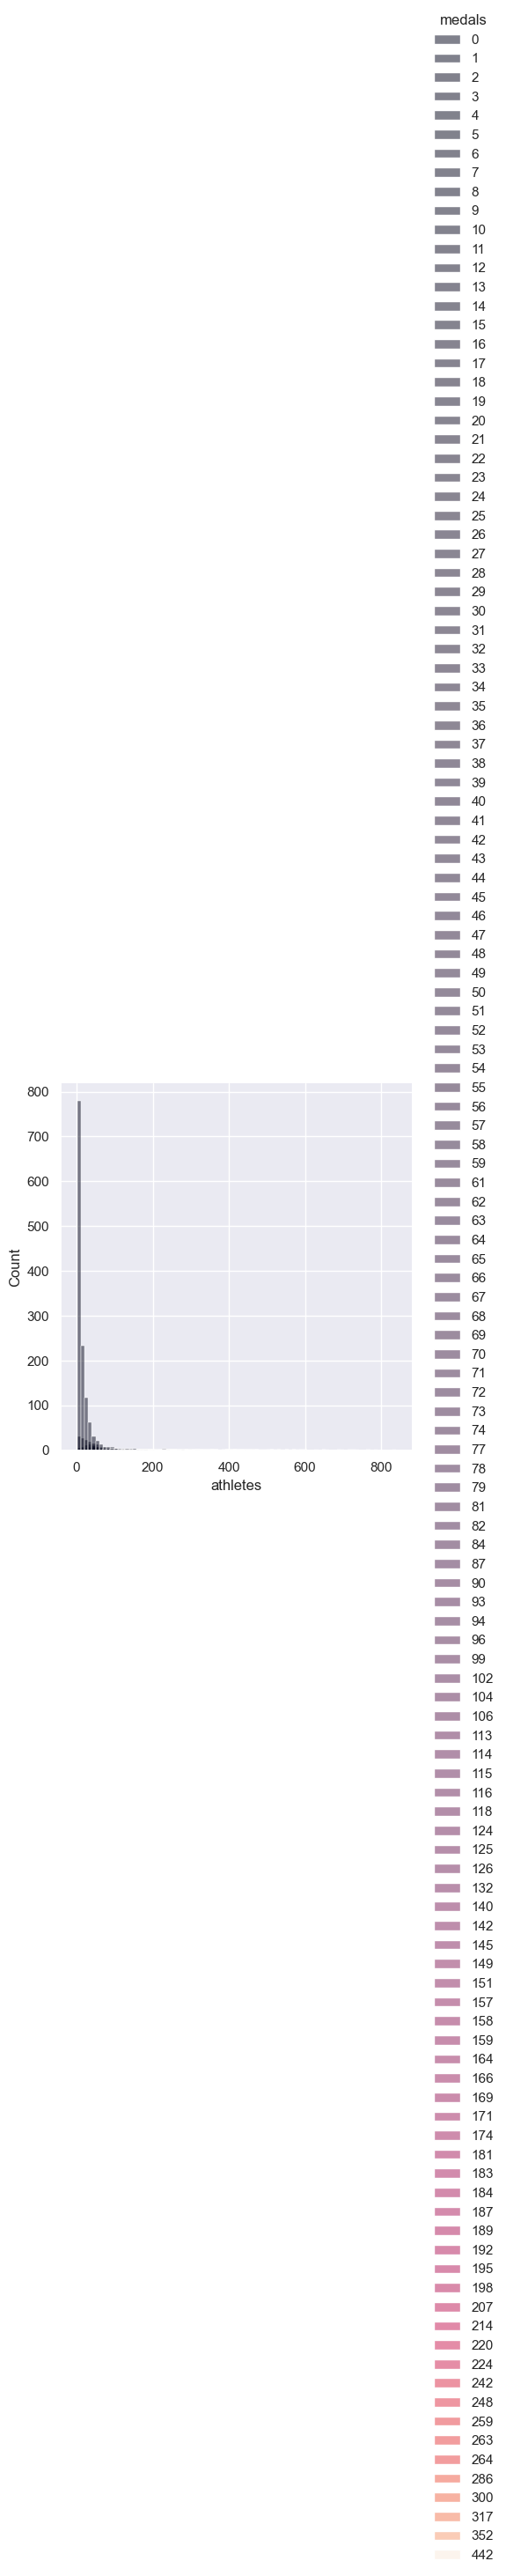

In [34]:
sns.displot(x = 'athletes', hue = 'medals', data = df, palette = 'rocket', kind = 'hist')

In [35]:
df['medals'].nunique()

133

In [37]:
df.head(10)

,year,events,athletes,age,height,weight,medals,prev_medals
0,1964,8,8,22.0,161.0,64.2,0,0
1,1968,5,5,23.2,170.2,70.0,0,0
2,1972,8,8,29.0,168.3,63.8,0,0
3,1980,11,11,23.6,168.4,63.2,0,0
4,2004,5,5,18.6,170.8,64.8,0,0
5,2008,4,4,22.5,179.2,62.8,1,0
6,2012,6,6,24.8,171.7,60.8,1,1
7,2016,3,3,24.7,173.7,74.0,0,1
8,1964,4,4,28.5,171.2,69.4,0,0
9,1968,4,5,31.0,173.2,67.8,0,0


In [38]:
a = df.drop(columns = ['medals'])

In [39]:
Y = df.iloc[:,-1]

In [40]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2139    0
2140    0
2141    3
2142    4
2143    0
Name: prev_medals, Length: 2144, dtype: int32

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(a,Y, test_size = 0.2,random_state=0,shuffle=True )

In [42]:
model = DecisionTreeClassifier()

In [43]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [44]:
predictions = model.predict(X_test)

In [47]:
accuracy_score(predictions,Y_test)

0.9557109557109557